# Extract DayNight Images

Create DayNight database for model training.

In [2]:
import sys
from pathlib import Path
import pandas as pd

current_dir = Path().resolve()
sys.path.append(str(current_dir.parent))
# from utils import ImageDataset, filter_dataframe, img_size_count, img_size_count_plot, resize_and_crop
import utils

In [3]:
labels_file_name = '../../no_sync/nexet/nexet/train.csv'

df_labels = pd.read_csv(labels_file_name)
df_labels.head(5)

image_filename  lighting city
0  frame_20f328fa-2459-46d0-97a5-5ae2d6103cb0_000...  Twilight  NYC
1  frame_927bde20-f97f-48c2-af30-f9127b6b32ce_000...       Day  NYC
2  frame_67012509-f3bd-4175-a9d2-565a7b6bb3c7_000...       Day  NYC
3  frame_bd043377-6fb8-407a-95e5-7deb1fbab13a_000...       Day  NYC
4  frame_4da1583b-58d0-4893-8149-54541191031d_000...       Day  NYC

In [4]:
img_folder = '../../no_sync/nexet/nexet/nexet_2017_1/'

img_folder = Path(img_folder)
file_count = len([f for f in img_folder.iterdir() if f.is_file()])
print(f'There are {file_count} files in the folder.')

There are 50001 files in the folder.


100%|██████████| 50000/50000 [00:02<00:00, 21774.22it/s]


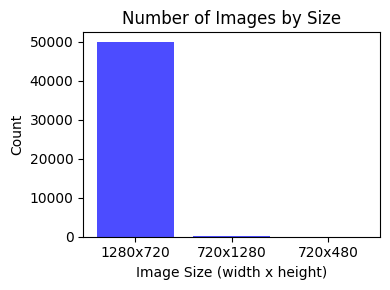

In [5]:
df_count = utils.img_size_count(img_folder)
utils.img_size_count_plot(df_count, show=True)

In [6]:
folders = {
        'input_A': {'lighting':['Day'], 'city':['NYC']},
        'input_B': {'lighting':['Night'], 'city':['NYC']},
    }

for out_folder, df_filter in folders.items():
    img_list = utils.filter_dataframe(df_labels, df_filter)['image_filename']
    utils.Images.build_dataset(
        img_list=img_list,
        img_folder=Path(img_folder),
        output_folder=Path('../../data/external/nexet/') / out_folder,
        transformation_function=utils.resize_and_crop,
        transformation_params={'target_size':(256,256), 'size_filter':[(1280, 720)]},
        split=0.8,
        random_seed=42
    )

100%|██████████| 4449/4449 [00:50<00:00, 87.77it/s]
